<a href="https://colab.research.google.com/github/shuvo1165/Machine-Learning/blob/main/Linear_Regration_with_Numerical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [ ]:
data = {'Size':[6,8,12,14,18,21],'Price':[350,775,1150,1395,1675,1999]}
df = pd.DataFrame(data)

In [ ]:
df

,Size,Price
0,6,350
1,8,775
2,12,1150
3,14,1395
4,18,1675
5,21,1999


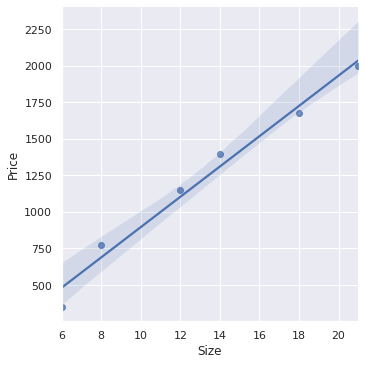

In [ ]:
sns.lmplot(data=df, x='Size', y='Price')

In [ ]:
df['Size_Price'] = df.Size*df.Price
df['Size_Squared'] = df.Size ** 2
#print(df.Size_Price,df.Size_Squared)

In [ ]:
Size_bar = np.sum(df.Size) / len(df.Size)
Price_bar = np.sum(df.Price) / len(df.Price)
Size_Price_bar = np.sum(df.Size_Price) / len(df.Size_Price)
Size_Squared_bar = np.sum(df.Size_Squared) / len(df.Size_Squared)
print(Size_bar, Price_bar,Size_Price_bar, Size_Squared_bar)

13.166666666666666 1224.0 18959.833333333332 200.83333333333334


In [ ]:
m = ((Size_bar*Price_bar)- Size_Price_bar)/((Size_bar**2) - Size_Squared_bar)
m

103.51668351870559

In [ ]:
c = Price_bar - m*Size_bar
c

-138.96966632962358

In [ ]:
def y(m,x,c):
    return m * x + c
print(y(m, 17, c))
print(y(m,16,c))

1620.8139534883715
1517.2972699696659


In [ ]:
R_value = []
for i in range(df.shape[0]):
    R_value.append(y(m,df.Size[i], c))
print(R_value)
df['R_value'] = R_value

[482.13043478261, 689.1638018200211, 1103.2305358948436, 1310.2639029322547, 1724.330637007077, 2034.880687563194]


In [ ]:
def R_Squared_Value(y, y_bar, y_cap):
    upper = []
    lower = []
    for i in range(y_cap.shape[0]):
        upper.append((y_cap[i] - y_bar) ** 2)
        lower.append((y[i] - y_bar) ** 2)
    return np.sum(upper) / np.sum(lower), upper, lower
R_square = R_Squared_Value(df.Price, Price_bar, df.R_value)
print(r"R^2 Value is {0:.2f}% and the Upper value is {1} and Lower Value is {2}".format(R_square[0], R_square[1],R_square[2]))

R^2 Value is 0.98% and the Upper value is [550370.4517958392, 286049.7588836136, 14585.263460246668, 7441.460949105465, 250330.7463279075, 657527.4894629582] and Lower Value is [763876.0, 201601.0, 5476.0, 29241.0, 203401.0, 600625.0]
